# Uvod i postavka problema
<br>
<br>
Klasifikacija muzičkih žanrova se sve više koristi u modernim sistemima preporuka, stoga je veoma važno poboljšavanje samih performansi. Na primer, Youtube, Spotify, Apple Music, svi oni intenzivno koriste žanrovsku klasifikaciju. Spotify čak pravi plejliste specifičnih žanrova koje ponudi slušaocu nakon što on pretraži taj žanr u search baru. Istraživanje iz 2019 je pokazalo da korisnici preferiraju automatske preporuke bazirane na žanrovima u odnosu na neke druge metode sličnosti.
<br>
<br>
U radu "Music Genre Classification with CNN Evaluation on
Mel Spectrograms and MFCCs" autori Tom Nguyen, Alice Zhang i Joseph Zhang su pokušali sa CNN klasifikacijom koja se bazira na ideji kombinovanja MFCC (Mel-Frequency Cepstral Coefficients) i spektrograma svake pesme, u poređenju sa nekim ranijim modelima koji su u obzir uzimali samo jedno ili drugo. Ovo bi u teoriji trebalo da poveća preciznost.

# Skup podataka
<br>
<br>
Koristićemo FMA (Free Music Archive) medium dataset koji sadrzi 25000 pesama duzine 30s i 16 nebalansiranih žanrova. Rok žanr ima oko 6000 pesama dok Soul-RnB ima svega 154 pesme. Iz ovog skupa podataka dobijeni su sledeći fajlovi:
<li> tracks.csv: informacije kao što su ID, naslov, izvođač, žanr itd.
<li> genres.csv: žanrovi zajedno sa svojom hijerarhijom.
<li> features.csv: neke karakteristike audio fajlova, poput mfcc, dobijene pomoću librosa biblioteke.
<br> 
<br>


## Primer Mel spektrograma i MFCC:

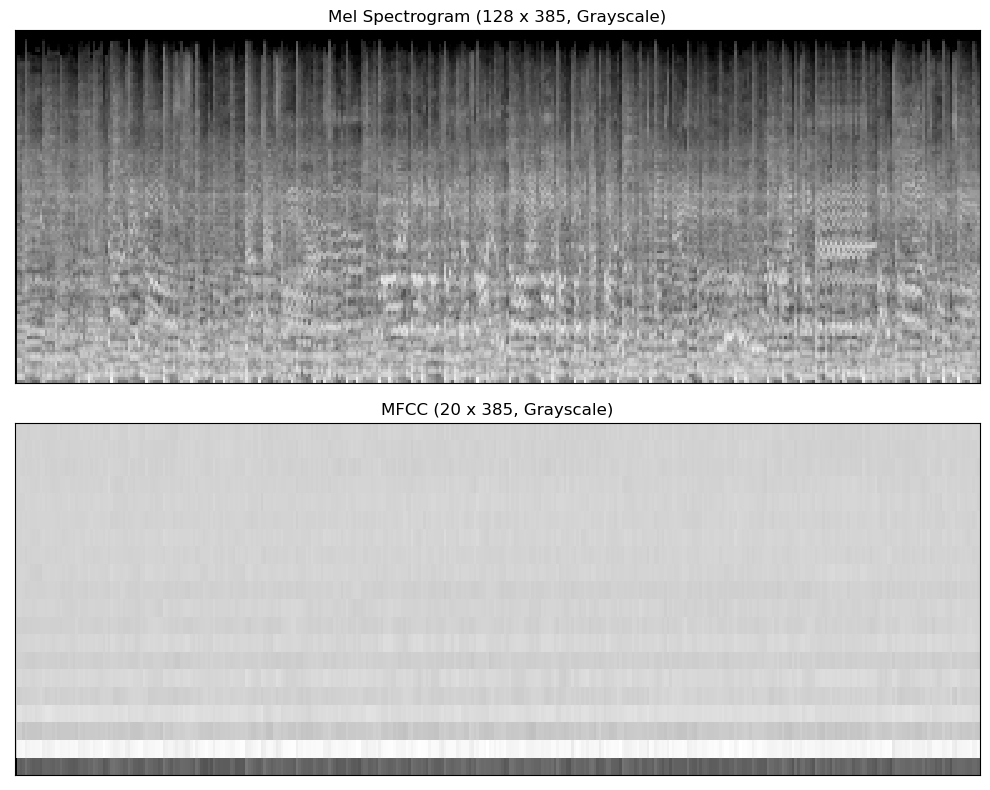

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from scipy.fftpack import dct


dataset_path = 'FMA_DATASET/fma_medium'


audio_files = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.mp3'):
            audio_files.append(os.path.join(root, file))


random_song = random.choice(audio_files)


y, sr = librosa.load(random_song, sr=None)


n_mels = 128  
n_fft = 2048  
hop_length = len(y) // 385  

mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)


log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)


log_mel_spectrogram = log_mel_spectrogram[:, :385]


mfcc = dct(log_mel_spectrogram, axis=0, type=2, norm='ortho')[:20]


mfcc = mfcc[:20, :385]


plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length, cmap='gray')
plt.title('Mel Spectrogram (128 x 385, Grayscale)')

plt.xticks([])
plt.yticks([])


plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, cmap='gray')
plt.title('MFCC (20 x 385, Grayscale)')

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


## 1 Metadata

In [24]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display


tracks = pd.read_csv('fma_metadata/tracks.csv', header=[0, 1], index_col=0,low_memory=False)
genres = pd.read_csv('fma_metadata/genres.csv', header=0, index_col=0,low_memory=False)
features = pd.read_csv('fma_metadata/features.csv', header=[0, 1, 2], index_col=0,low_memory=False)
echonest = pd.read_csv('fma_metadata/echonest.csv', header=[0, 1], index_col=0,low_memory=False)


ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())


tracks.shape, genres.shape,features.shape,echonest.shape

bit_rate  comments   composer         date_created  \
track_id                                                       
2           256000         0        NaN  2008-11-26 01:48:12   
3           256000         0        NaN  2008-11-26 01:48:14   
5           256000         0        NaN  2008-11-26 01:48:20   
10          192000         0  Kurt Vile  2008-11-25 17:49:06   
20          256000         0        NaN  2008-11-26 01:48:56   

                date_recorded  duration  favorites genre_top     genres  \
track_id                                                                  
2         2008-11-26 00:00:00       168          2   Hip-Hop       [21]   
3         2008-11-26 00:00:00       237          1   Hip-Hop       [21]   
5         2008-11-26 00:00:00       206          6   Hip-Hop       [21]   
10        2008-11-26 00:00:00       161        178       Pop       [10]   
20        2008-01-01 00:00:00       311          0       NaN  [76, 103]   

                 genres_all information  interest language_code  \
track_id                                                          
2                      [21]         NaN      4656            en   
3                      [21]         NaN      1470            en   
5                      [21]         NaN      1933            en   
10                     [10]         NaN     54881            en   
20        [17, 10, 76, 103]         NaN       978            en   

                                                    license  listens lyricist  \
track_id                                                                        
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...      514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...    50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...      361      NaN   

          number publisher tags            title  
track_id                                          
2              3       NaN   []             Food  
3              4       NaN   []     Electric Ave  
5              6       NaN   []       This World  
10             1       NaN   []          Freeway  
20             3       NaN   []  Spiritual Level

comments         date_created        date_released engineer  \
track_id                                                                
2                0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3                0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5                0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10               0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20               0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

          favorites  id                                information  listens  \
track_id                                                                      
2                 4   1                                    <p></p>     6073   
3                 4   1                                    <p></p>     6073   
5                 4   1                                    <p></p>     6073   
10                4   6                                        NaN    47632   
20                2   4  <p> "spiritual songs" from Nicky Cook</p>     2710   

         producer tags                 title  tracks   type  
track_id                                                     
2             NaN   []  AWOL - A Way Of Life       7  Album  
3             NaN   []  AWOL - A Way Of Life       7  Album  
5             NaN   []  AWOL - A Way Of Life       7  Album  
10            NaN   []     Constant Hitmaker       2  Album  
20            NaN   []                 Niris      13  Album

active_year_begin      active_year_end  \
track_id                                             
2         2006-01-01 00:00:00                  NaN   
3         2006-01-01 00:00:00                  NaN   
5         2006-01-01 00:00:00                  NaN   
10                        NaN                  NaN   
20        1990-01-01 00:00:00  2011-01-01 00:00:00   

                                          associated_labels  \
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   

                                                        bio  comments  \
track_id                                                                
2         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
10        <p><span style="font-family:Verdana, Geneva, A...         3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...         2   

                 date_created  favorites  id   latitude            location  \
track_id                                                                      
2         2008-11-26 01:42:32          9   1  40.058324          New Jersey   
3         2008-11-26 01:42:32          9   1  40.058324          New Jersey   
5         2008-11-26 01:42:32          9   1  40.058324          New Jersey   
10        2008-11-26 01:42:55         74   6        NaN                 NaN   
20        2008-11-26 01:42:52         10   4  51.895927  Colchester England   

          longitude                                            members  \
track_id                                                                 
2        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
3        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
5        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
10              NaN                           Kurt Vile, the Violators   
20         0.891874                                       Nicky Cook\n   

                name                                   related_projects  \
track_id                                                                  
2               AWOL  The list of past projects is 2 long but every1...   
3               AWOL  The list of past projects is 2 long but every1...   
5               AWOL  The list of past projects is 2 long but every1...   
10         Kurt Vile                                                NaN   
20        Nicky Cook                                                NaN   

                                                       tags  \
track_id                                                      
2                                                  ['awol']   
3                                                  ['awol']   
5                                                  ['awol']   
10                                  ['philly', 'kurt vile']   
20        ['instrumentals', 'experimental pop', 'post pu...   

                                          website wikipedia_page  
track_id                                                          
2         http://www.AzillionRecords.blogspot.com            NaN  
3         http://www.AzillionRecords.blogspot.com            NaN  
5         http://www.AzillionRecords.blogspot.com            NaN  
10                            http://kurtvile.com            NaN  
20                                            NaN            NaN

split  subset
track_id                  
2         training   small
3         training  medium
5         training   small
10        training   small
20        training   large

((106574, 52), (163, 4), (106574, 518), (13131, 249))

## 1.1 Subsets

In [25]:
for subset in tracks['set', 'subset'].unique():
    indicator = tracks['set', 'subset'] >= subset
    print('{:6} {:6} tracks'.format(
        subset, sum(indicator) ))

small    8000 tracks
medium  25000 tracks
large  106574 tracks


## 2 Žanrovi

In [26]:
print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)

16 top-level genres


#tracks  parent                title  top_level
genre_id                                                 
38          38154       0         Experimental         38
15          34413       0           Electronic         15
12          32923       0                 Rock         12
1235        14938       0         Instrumental       1235
10          13845       0                  Pop         10
17          12706       0                 Folk         17
21           8389       0              Hip-Hop         21
2            5271       0        International          2
4            4126       0                 Jazz          4
5            4106       0            Classical          5
9            1987       0              Country          9
20           1876       0               Spoken         20
3            1752       0                Blues          3
14           1499       0             Soul-RnB         14
8             868       0  Old-Time / Historic          8
13            730       0       Easy Listening         13

C:\Users\Q\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    106574.000000
mean        277.849100
std         305.518553
min           0.000000
25%         149.000000
50%         216.000000
75%         305.000000
max       18350.000000
Name: (track, duration), dtype: float64

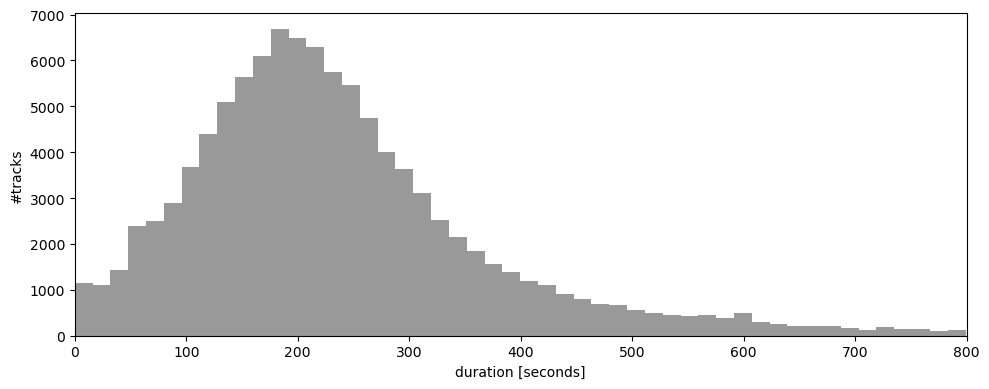

In [27]:
durations = tracks['track', 'duration']
plt.figure(figsize=(10, 4)) 
p = sns.distplot(durations[durations.values < 800], kde=False, rug=False, color='k', hist_kws=dict(alpha=0.4))
p.set_xlabel('duration [seconds]')
p.set_ylabel('#tracks')
p.set_xlim(0, 800)
plt.tight_layout()

durations.describe()

C:\Users\Q\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1, 38154)

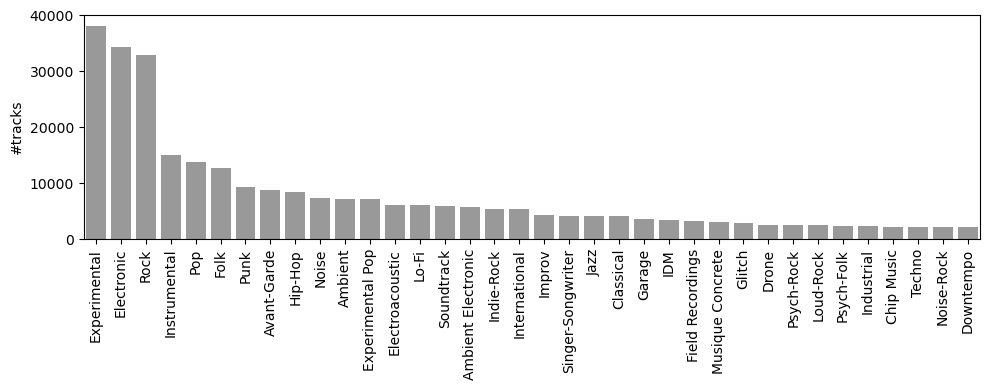

In [28]:
d = genres[genres['#tracks'] > 2000].sort_values('#tracks', ascending=False)  # Poster: 5000
plt.figure(figsize=(10, 4))
p = sns.barplot('title', '#tracks', data=d, color='k', alpha=0.4)
p.set_xlabel('')
p.set_ylabel('#tracks')
plt.xticks(rotation=90)
plt.tight_layout()
genres.loc[genres['#tracks'] > 0, '#tracks'].min(), genres['#tracks'].max()

## 3 Features

In [29]:
print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    ipd.display(features[column].head().style.format('{:.2f}'))




518 features for 106574 tracks


## 3.1 Echonest features

In [30]:
def display_section(section_name):
    section_columns = [col for col in echonest.columns if section_name in col[1]]
    section_df = echonest.loc[:, section_columns]
    ipd.display(section_df.head())

# Display each section
print("Metadata Section:")
display_section('metadata')

print("Audio Features Section:")
display_section('audio_features')

print("Social Features Section:")
display_section('social_features')

print("Ranks Section:")
display_section('ranks')

print("Temporal Features Section:")
display_section('temporal_features')

Metadata Section:


echonest                                                \
            metadata  metadata.1       metadata.2       metadata.3   
NaN       album_date  album_name  artist_latitude  artist_location   
track_id         NaN         NaN              NaN              NaN   
2                NaN         NaN    32.6783000000      Georgia, US   
3                NaN         NaN    32.6783000000      Georgia, US   
5                NaN         NaN    32.6783000000      Georgia, US   

                                                               
                metadata.4   metadata.5            metadata.6  
NaN       artist_longitude  artist_name               release  
track_id               NaN          NaN                   NaN  
2           -83.2230000000         AWOL  AWOL - A Way Of Life  
3           -83.2230000000         AWOL  AWOL - A Way Of Life  
5           -83.2230000000         AWOL  AWOL - A Way Of Life

Audio Features Section:


echonest                                                      \
         audio_features audio_features.1 audio_features.2  audio_features.3   
NaN        acousticness     danceability           energy  instrumentalness   
track_id            NaN              NaN              NaN               NaN   
2          0.4166752327     0.6758939853     0.6344762684      0.0106280683   
3          0.3744077685     0.5286430621     0.8174611317      0.0018511032   
5          0.0435668989     0.7455658702     0.7014699916      0.0006967990   

                                                                              
         audio_features.4 audio_features.5 audio_features.6 audio_features.7  
NaN              liveness      speechiness            tempo          valence  
track_id              NaN              NaN              NaN              NaN  
2            0.1776465712     0.1593100648   165.9220000000     0.5766609880  
3            0.1058799438     0.4618181276   126.9570000000     0.2692402421  
5            0.3731433124     0.1245953419   100.2600000000     0.6216612236

Social Features Section:


echonest                                         \
           social_features   social_features.1  social_features.2   
NaN       artist_discovery  artist_familiarity  artist_hotttnesss   
track_id               NaN                 NaN                NaN   
2             0.3889898648        0.3867400000       0.4063700000   
3             0.3889898648        0.3867400000       0.4063700000   
5             0.3889898648        0.3867400000       0.4063700000   

                                              
         social_features.3 social_features.4  
NaN          song_currency   song_hotttnesss  
track_id               NaN               NaN  
2             0.0000000000      0.0000000000  
3             0.0000000000      0.0000000000  
5             0.0000000000      0.0000000000

Ranks Section:


echonest                           \
                          ranks                  ranks.1   
NaN       artist_discovery_rank  artist_familiarity_rank   
track_id                    NaN                      NaN   
2                           NaN                      NaN   
3                           NaN                      NaN   
5                           NaN                      NaN   

                                                                            
                         ranks.2             ranks.3               ranks.4  
NaN       artist_hotttnesss_rank  song_currency_rank  song_hotttnesss_rank  
track_id                     NaN                 NaN                   NaN  
2                            NaN                 NaN                   NaN  
3                            NaN                 NaN                   NaN  
5                            NaN                 NaN                   NaN

Temporal Features Section:


echonest                                          \
         temporal_features temporal_features.1 temporal_features.2   
NaN               0.000000            1.000000            2.000000   
track_id               NaN                 NaN                 NaN   
2                 0.877233            0.588911            0.354243   
3                 0.534429            0.537414            0.443299   
5                 0.548093            0.720192            0.389257   

                                                                      \
         temporal_features.3 temporal_features.4 temporal_features.5   
NaN                 3.000000            4.000000            5.000000   
track_id                 NaN                 NaN                 NaN   
2                   0.295090            0.298413            0.309430   
3                   0.390879            0.344573            0.366448   
5                   0.344934            0.361300            0.402543   

                                                                      \
         temporal_features.6 temporal_features.7 temporal_features.8   
NaN                 6.000000            7.000000            8.000000   
track_id                 NaN                 NaN                 NaN   
2                   0.304496            0.334579            0.249495   
3                   0.419455            0.747766            0.460901   
5                   0.434044            0.388137            0.512487   

                              ...                                              \
         temporal_features.9  ... temporal_features.214 temporal_features.215   
NaN                 9.000000  ...            214.000000            215.000000   
track_id                 NaN  ...                   NaN                   NaN   
2                   0.259656  ...             -1.992303              6.805694   
3                   0.392379  ...             -1.582331              8.889308   
5                   0.525755  ...             -2.288358             11.527109   

                                                                            \
         temporal_features.216 temporal_features.217 temporal_features.218   
NaN                 216.000000            217.000000            218.000000   
track_id                   NaN                   NaN                   NaN   
2                     0.233070              0.192880              0.027455   
3                     0.258464              0.220905              0.081368   
5                     0.256821              0.237820              0.060122   

                                                                            \
         temporal_features.219 temporal_features.220 temporal_features.221   
NaN                  219.00000             220.00000             221.00000   
track_id                   NaN                   NaN                   NaN   
2                      0.06408               3.67696               3.61288   
3                      0.06413               6.08277               6.01864   
5                      0.06014               5.92649               5.86635   

                                                      
         temporal_features.222 temporal_features.223  
NaN                 222.000000            223.000000  
track_id                   NaN                   NaN  
2                    13.316690            262.929749  
3                    16.673548            325.581085  
5                    16.013849            356.755737  

[5 rows x 224 columns]

In [31]:
section_columns = [col for col in echonest.columns if 'temporal_features' in col[1]]
section_tf = echonest.loc[:, section_columns]

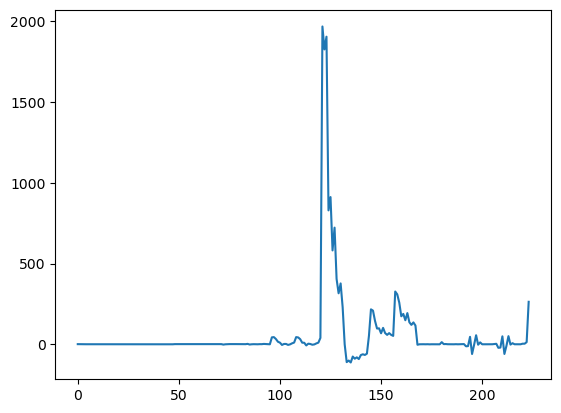

In [32]:
track_id = '2'
x=section_tf.loc[track_id]
plt.plot(x.values)



## 3.2 MFCC karakteristike približno razdvajaju žanrove

C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


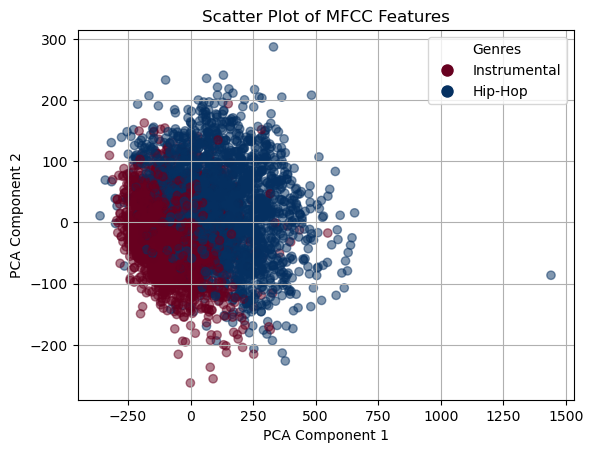

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl


small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Hip-Hop'

X = features.loc[small & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)


scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', alpha=0.5)


labels = ['Instrumental', 'Hip-Hop']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels[i],
                       markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i in range(len(labels))]

plt.legend(handles=handles, title='Genres')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of MFCC Features')
plt.grid()
plt.show()


## 4 Audio

In [34]:
import librosa
from IPython.display import Audio, display

x, sr = librosa.load('FMA_DATASET/fma_medium/000/000002.mp3', sr=None)
display(Audio(data=x, rate=sr))


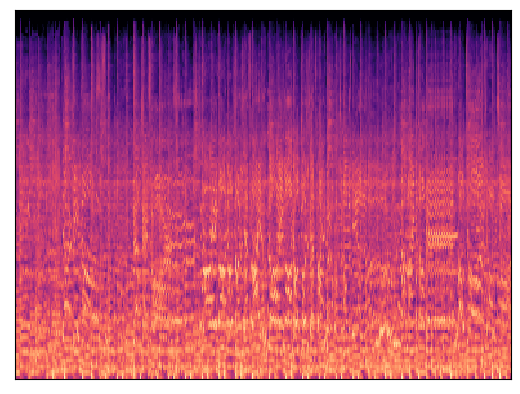

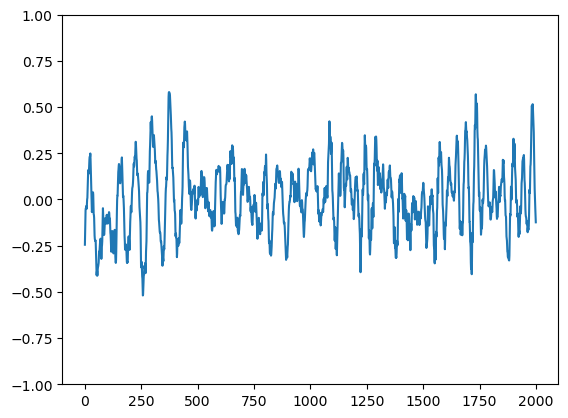

In [35]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length)

start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1));

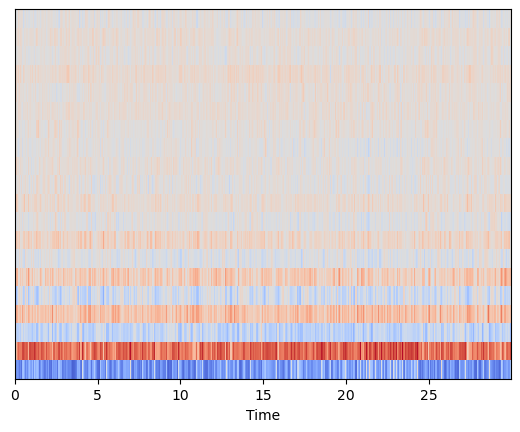

In [36]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl.preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time');

## Klasifikacija osnovnim modelima

In [37]:
tracks[('set', 'subset')] = tracks[('set', 'subset')].astype(str)

small = tracks[('set', 'subset')] == 'small'
train = tracks[('set', 'split')] == 'training'
test = tracks[('set', 'split')] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]

X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))


6400 training examples, 800 testing examples
140 features, 8 classes


In [38]:
from sklearn import metrics
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=7)

scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Model 1: Support vector
model1 = skl.svm.SVC()
model1.fit(X_train, y_train)
print(metrics.classification_report(y_test,model1.predict(X_test)))
score = model1.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.

               precision    recall  f1-score   support

   Electronic       0.44      0.60      0.51       100
 Experimental       0.34      0.44      0.38       100
         Folk       0.24      0.20      0.22       100
      Hip-Hop       0.63      0.68      0.65       100
 Instrumental       0.51      0.42      0.46       100
International       0.54      0.48      0.51       100
          Pop       0.34      0.25      0.29       100
         Rock       0.66      0.64      0.65       100

     accuracy                           0.46       800
    macro avg       0.46      0.46      0.46       800
 weighted avg       0.46      0.46      0.46       800



C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 46.38%


In [39]:
#Model 2: Slucajne sume

from sklearn import ensemble
model_2 = ensemble.RandomForestClassifier(n_estimators=20, max_depth=3, random_state=7)
model_2.fit(X_train, y_train)
y_predicted = model_2.predict(X_test)
metrics.accuracy_score(y_test, y_predicted)


C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.34375

In [41]:
# Model 3: Bagging Classifier 
from sklearn import tree
model3 = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
model3.fit(X_train, y_train)
y_predicted = model3.predict(X_test)
metrics.accuracy_score(y_test, y_predicted)


C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Q\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.39875

In [42]:
import xgboost

In [43]:
from sklearn.preprocessing import LabelEncoder

# Model 4: XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


model_xgboost = xgboost.XGBClassifier(objective='multi:softmax', n_estimators=100, max_depth=3)
model_xgboost.fit(X_train, y_train_encoded)

y_predicted_encoded = model_xgboost.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_predicted_encoded)

print(f'Accuracy: {accuracy}')


Accuracy: 0.42375
